In [27]:
import cv2
import numpy as np


img = cv2.imread('IA_1F062056103.jpg')
print(img.shape)
# 沿着横纵轴放大2倍，然后平移(-150,-240)，最后沿原图大小截取，等效于裁剪并放大
M_crop_trans = np.array([
    [2, 0, -150],
    [0, 2, -240]
], dtype=np.float32)

img_crop_trans = cv2.warpAffine(img, M_crop_trans, (224, 224),borderValue=(255,255,255))
cv2.imwrite('img_crop_trans.jpg', img_crop_trans)

M_crop_trans = np.array([
    [2, 0, -50],
    [0, 2, -100]
], dtype=np.float32)

img_crop_trans = cv2.warpAffine(img, M_crop_trans, (224, 224),borderValue=(255,255,255))
cv2.imwrite('img_crop_trans1.jpg', img_crop_trans)


M_crop_trans = np.array([
    [2, 0, -240],
    [0, 2, -100]
], dtype=np.float32)

img_crop_trans = cv2.warpAffine(img, M_crop_trans, (224, 224),borderValue=(255,255,255))
cv2.imwrite('img_crop_trans2.jpg', img_crop_trans)

img2 = cv2.flip(img, -1)
cv2.imwrite('img2.jpg',img2)
img1 = cv2.flip(img, 0)
cv2.imwrite('img1.jpg',img1)
# x轴的剪切shear变换，角度45°
theta = 270* np.pi / 180
M_shear = np.array([
    [1, np.tan(theta), 0],
    [0, 1, 0]
], dtype=np.float32)

img_sheared = cv2.warpAffine(img, M_shear, (224, 224),borderValue=(255,255,255))
cv2.imwrite('img_sheared.jpg', img_sheared)

# 顺时针旋转，角度45°
M_rotate = np.array([
    [np.cos(theta), -np.sin(theta), 0],
    [np.sin(theta), np.cos(theta), 0]
], dtype=np.float32)

img_rotated = cv2.warpAffine(img, M_rotate, (224, 224),borderValue=(255,255,255))
cv2.imwrite('img_rotated.jpg', img_rotated)

# 某种变换，具体旋转+缩放+旋转组合可以通过SVD分解理解
M = np.array([
    [1, 1.5, -400],
    [0.5, 2, -100]
], dtype=np.float32)

img_transformed = cv2.warpAffine(img, M, (224, 224),borderValue=(255,255,255))
cv2.imwrite('img_transformed.jpg', img_transformed)

(224, 224, 3)


True

In [19]:
height,width=img.shape[:2]

degree=45
#旋转后的尺寸
heightNew=int(width*fabs(sin(radians(degree)))+height*fabs(cos(radians(degree))))
widthNew=int(height*fabs(sin(radians(degree)))+width*fabs(cos(radians(degree))))

matRotation=cv2.getRotationMatrix2D((width/2,height/2),degree,1)

matRotation[0,2] +=(widthNew-width)/2  #重点在这步，目前不懂为什么加这步
matRotation[1,2] +=(heightNew-height)/2  #重点在这步

imgRotation=cv2.warpAffine(img,matRotation,(224,224),borderValue=(255,255,255))
cv2.imwrite('imgRotation.jpg', imgRotation)

NameError: name 'widthNew' is not defined

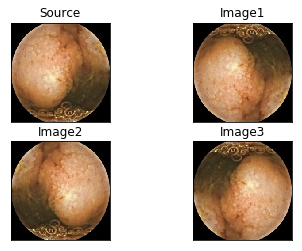

In [24]:
import matplotlib.pyplot as plt
src = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

#图像翻转
#0以X轴为对称轴翻转 >0以Y轴为对称轴翻转 <0X轴Y轴翻转
img1 = cv2.flip(src, 0)
img2 = cv2.flip(src, 1)
img3 = cv2.flip(src, -1)
cv2.imwrite('img2.jpg',img2)
#显示图形
titles = ['Source', 'Image1', 'Image2', 'Image3']  
images = [src, img1, img2, img3]  
for i in range(4):  
   plt.subplot(2,2,i+1), plt.imshow(images[i], 'gray')  
   plt.title(titles[i])  
   plt.xticks([]),plt.yticks([])  
plt.show()  

In [1]:
#加载依赖包
from keras.models import load_model
import keras.backend as K
import numpy as np
import cv2
import pandas as pd
#from efficientnet.preprocessing import preprocess_input
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
from sklearn.model_selection import train_test_split
import os
import shutil
from tqdm import tqdm

import os
import sys
import glob
import argparse
import matplotlib.pyplot as plt

from keras import __version__
# from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.applications.resnet50 import preprocess_input,ResNet50

from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD

D:\anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
D:\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '

In [25]:
model=load_model('my_model_final.h5',compile=False)
#last_conv_layer_name='global_average_pooling2d_2'
last_conv_layer_channel=2048
class_idx=0
last_conv_layer_name='bn5c_branch2c'

In [26]:
#获取热力图函数
def Grad_CAM_map(model,last_conv_layer_name,last_conv_layer_channel,img_name,class_idx):
    img_path_pre='WCE2\\train\\0-abnormal\\'+img_name
    
    img=cv2.imread(img_path_pre)
    x = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    x=preprocess_input(x)
    x=np.expand_dims(x, axis=0)
    preds = model.predict(x)
    class_output = model.output[:, class_idx]
    last_conv_layer = model.get_layer(last_conv_layer_name)
    grads = K.gradients(class_output, last_conv_layer.output)[0]
    pooled_grads = K.mean(grads, axis=(0, 1, 2))
    iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
    pooled_grads_value, conv_layer_output_value = iterate([x])
    for i in range(last_conv_layer_channel):
        conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
    heatmap = np.mean(conv_layer_output_value, axis=-1)
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)
    #print(heatmap.shape)
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255 * heatmap) 
    #heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    #heatmap=cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
   # print(max.all(heatmap))
    idx = np.argmax(heatmap)
    print(idx)
    m, n = divmod(idx, 224)
    print(m,n)
    print(heatmap[m,n])
    return img,heatmap,idx

In [29]:
#图像增强函数
def img_data(image):
    img,superimposed_img,idx=Grad_CAM_map(model,last_conv_layer_name,last_conv_layer_channel,image,class_idx)
    if(idx==0):
        return
    else:
        gradX = cv2.Sobel(superimposed_img, ddepth=cv2.CV_32F, dx=1, dy=0, ksize=-1)
        gradY = cv2.Sobel(superimposed_img, ddepth=cv2.CV_32F, dx=0, dy=1, ksize=-1)

        # subtract the y-gradient from the x-gradient
        gradient = cv2.subtract(gradX, gradY)
        gradient = cv2.convertScaleAbs(gradient)

        blurred = cv2.blur(gradient, (9, 9))
        (_, thresh) = cv2.threshold(blurred, 90, 255, cv2.THRESH_BINARY)
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (25, 25))
        closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
        closed = cv2.erode(closed, None, iterations=4)
        closed = cv2.dilate(closed, None, iterations=4)

        s,cnts, _ = cv2.findContours(closed.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        d = sorted(cnts, key=cv2.contourArea, reverse=True)
        #print(len(d))
        c = d[0]

        rect = cv2.minAreaRect(c)
        box = np.int0(cv2.boxPoints(rect))

        # draw a bounding box arounded the detected barcode and display the image

        Xs = [i[0] for i in box]
        Ys = [i[1] for i in box]
        x1 = min(Xs)
        x2 = max(Xs)
        y1 = min(Ys)
        y2 = max(Ys)
        hight = y2 - y1
        width = x2 - x1
        cropImg = img[y1:y1+hight, x1:x1+width]
        cropImg = cv2.cvtColor(cropImg, cv2.COLOR_BGR2RGB)
        cv2.imwrite("WCE2\\train\\0-abnormal\\image\\data"+image, cropImg)

In [ ]:
import os
video_path = 'WCE2\\train\\0-abnormal\\'
for video in os.listdir(video_path):
    image_path = os.path.join(video_path,video)
    img_data(video)

32175
143 143
252
39375
175 175
253
18031
80 111
253
25007
111 143
252
25039
111 175
252
25168
112 80
252
39407
175 207
254
32110
143 78
253
143
0 143
253
32367
144 111
251
32111
143 79
253
24864
111 0
254
17840
79 144
251
17135
76 111
253
17999
80 79
253
32175
143 143
253
17839
79 143
247
17775
79 79
247
39341
175 141
254
32368
144 112
254
39567
176 143
254
39342
175 142
253
39568
176 144
254


D:\anaconda\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide


0
0 0
0
24975
111 111
247
39343
175 143
251
18031
80 111
254
24944
111 80
253
25232
112 144
250
17871
79 175
247
32399
144 143
250
46735
208 143
254
39600
176 176
251
17904
79 208
253
39536
176 112
253
0
0 0
0
25007
111 143
247
32207
143 175
252
32175
143 143
250
0
0 0
0
143
0 143
254
17840
79 144
251
25007
111 143
253
17872
79 176
252
18000
80 80
253
32143
143 111
253
25008
111 144
254
18064
80 144
253
46731
208 139
254
18063
80 143
254
32175
143 143
253
24975
111 111
253
32399
144 143
249
17775
79 79
247
24911
111 47
253
17808
79 112
252
17743
79 47
253
10895
48 143
253
39279
175 79
253
39407
175 207
254
25008
111 144
253
25167
112 79
253
32431
144 175
251
24975
111 111
252
17775
79 79
252
32079
143 47
253
18032
80 112
253
39247
175 47
252
39408
175 208
254
24719
110 79
253
32235
143 203
253
39375
175 175
252
18124
80 204
254
25167
112 79
253
34800
155 80
254
25008
111 144
251
10863
48 111
253
17808
79 112
253
24943
111 79
253
32079
143 47
253
39246
175 46
253
32080
143 48
253
39280


25136
112 48
254
25007
111 143
250
24944
111 80
253
0
0 0
0
25136
112 48
252
39375
175 175
249
0
0 0
0
18031
80 111
250
32080
143 48
251
32079
143 47
247
46671
208 79
251
24944
111 80
252
24943
111 79
250
25199
112 111
252
32143
143 111
252
25167
112 79
253
32143
143 111
252
25199
112 111
250
25168
112 80
252
32112
143 80
249
32112
143 80
251
17872
79 176
250
32207
143 175
248
25263
112 175
250
32208
143 176
251
24943
111 79
248
25008
111 144
251
18127
80 207
253
18096
80 176
253
25231
112 143
251
25263
112 175
251
32207
143 175
252
18032
80 112
251
0
0 0
0
39599
176 175
252
18063
80 143
252
32175
143 143
248
25200
112 112
251
18000
80 80
252
17871
79 175
250
32143
143 111
247
17807
79 111
251
17871
79 175
249
32144
143 112
250
17839
79 143
252
17807
79 111
251
18064
80 144
251
17839
79 143
252
18064
80 144
251
18064
80 144
252
32207
143 175
252
39056
174 80
251
17775
79 79
252
17920
80 0
253
0
0 0
0
24912
111 48
252
39376
175 176
251
32400
144 144
251
32399
144 143
253
17807
79 111
25

251
25072
111 208
254
17839
79 143
253
10863
48 111
253
32399
144 143
253
25007
111 143
253
17840
79 144
252
25008
111 144
253
25008
111 144
252
32304
144 48
254
24912
111 48
253
25231
112 143
253
39503
176 79
254
32256
144 0
254
17968
80 48
253
17998
80 78
253
24016
107 48
253
25136
112 48
254
18032
80 112
254
22736
101 112
253
32144
143 112
254
32174
143 142
253
39343
175 143
253
39312
175 112
254
39311
175 111
252
32144
143 112
253
32143
143 111
252
17999
80 79
253
20016
89 80
253
32139
143 107
253
32144
143 112
254
32335
144 79
249
32208
143 176
253
46704
208 112
254
39343
175 143
252
39311
175 111
254
25008
111 144
254
39535
176 111
253
46703
208 111
251
46800
208 208
255
25168
112 80
251
32112
143 80
253
25007
111 143
251
32431
144 175
252
25198
112 110
253
0
0 0
0
32335
144 79
252
17808
79 112
251
32143
143 111
251
25167
112 79
253
32111
143 79
252
25199
112 111
253
17808
79 112
252
32143
143 111
253
25231
112 143
253
32144
143 112
253
24975
111 111
253
32112
143 80
250
32111
14

80 144
253
18064
80 144
251
25231
112 143
252
18031
80 111
250
17840
79 144
248
17839
79 143
253
17807
79 111
251
18063
80 143
251
17775
79 79
247
25008
111 144
250
18063
80 143
250
17839
79 143
247
10640
47 112
250
0
0 0
0
0
0 0
0
17871
79 175
247
18096
80 176
249
25039
111 175
251
17904
79 208
253
17871
79 175
247
17904
79 208
251
0
0 0
0
18096
80 176
251
18128
80 208
252
18096
80 176
250
10927
48 175
254
10607
47 79
247
17776
79 80
248
32240
143 208
253
25039
111 175
247
18096
80 176
251
18095
80 175
251
18095
80 175
253
18062
80 142
252
17775
79 79
247
10639
47 111
247
0
0 0
0
10607
47 79
247
24969
111 105
253
17784
79 88
253
32111
143 79
252
32032
143 0
253
17744
79 48
249
32111
143 79
253
18063
80 143
251
18031
80 111
253
17839
79 143
248
17871
79 175
249
32175
143 143
248
18000
80 80
252
17775
79 79
252
79
0 79
251
17871
79 175
252
17839
79 143
247
10896
48 144
251
17840
79 144
253
32111
143 79
249
17871
79 175
250
17839
79 143
249
10639
47 111
247
10671
47 143
252
18064
80 144


79 48
249
24864
111 0
254
17776
79 80
253
25199
112 111
253
0
0 0
0
17904
79 208
251
18000
80 80
250
17872
79 176
250
24943
111 79
252
24975
111 111
250
10895
48 143
249
32175
143 143
254
17999
80 79
252
25263
112 175
253
32032
143 0
253
10608
47 80
251
32143
143 111
252
24912
111 48
253
39567
176 143
254
28335
126 111
253
46543
207 175
254
17776
79 80
252
17776
79 80
253
18063
80 143
252
32304
144 48
253
32016
142 208
254
32464
144 208
253
32144
143 112
252
24943
111 79
248
17807
79 111
253
17839
79 143
251
17808
79 112
249
17871
79 175
250
18095
80 175
252
17807
79 111
252
0
0 0
0
0
0 0
0
39279
175 79
253
32111
143 79
253
32176
143 144
253
25039
111 175
252
10639
47 111
249
10863
48 111
251
18000
80 80
251
17839
79 143
252
18063
80 143
250
17807
79 111
251
18095
80 175
252
24912
111 48
251
17871
79 175
253
25072
111 208
254
17904
79 208
251
10896
48 144
252
17775
79 79
251
32431
144 175
251
17775
79 79
253
39312
175 112
251
24864
111 0
253
18032
80 112
253
25135
112 47
253
24943
111 

17999
80 79
253
25167
112 79
252
39312
175 112
250
17999
80 79
250
17775
79 79
248
18000
80 80
253
10447
46 143
253
25167
112 79
248
17839
79 143
249
24911
111 47
251
17999
80 79
249
17871
79 175
248
112
0 112
254
25039
111 175
248
144
0 144
254
24976
111 112
250
17968
80 48
249
10800
48 48
251
0
0 0
0
32111
143 79
251
32111
143 79
247
39343
175 143
251
10639
47 111
250
39343
175 143
251
18000
80 80
252
18032
80 112
252
18031
80 111
252
18095
80 175
253
17904
79 208
253
24975
111 111
249
25136
112 48
252
39343
175 143
253
32207
143 175
250
39311
175 111
247
25263
112 175
250
0
0 0
0
32079
143 47
249
46704
208 112
254
10864
48 112
253
39343
175 143
248
25008
111 144
248
0
0 0
0
110
0 110
254
17871
79 175
247
32032
143 0
251
0
0 0
0
17807
79 111
250
24975
111 111
247
32176
143 144
253
46800
208 208
255
25007
111 143
250
32144
143 112
251
24944
111 80
249
39312
175 112
251
39567
176 143
252
32111
143 79
247
32144
143 112
252
24944
111 80
248
25007
111 143
252
32335
144 79
252
25200
112 11

143 143
253
32400
144 144
254
32175
143 143
253
32361
144 105
253
39280
175 80
253
24912
111 48
249
17840
79 144
251
32431
144 175
253
32143
143 111
253
39375
175 175
249
10607
47 79
252
25072
111 208
253
32335
144 79
251
25290
112 202
253
10446
46 142
254
25200
112 112
251
25200
112 112
254
25263
112 175
253
18031
80 111
253
17807
79 111
253
24911
111 47
250
32399
144 143
250
31360
140 0
254
39280
175 80
251
25199
112 111
252
25200
112 112
252
32175
143 143
253
39341
175 141
252
39368
175 168
254
39247
175 47
248
32207
143 175
250
24944
111 80
252
32175
143 143
250
17840
79 144
252
25035
111 171
254
18095
80 175
253
17839
79 143
254
32336
144 80
253
39087
174 111
253
18128
80 208
252
24943
111 79
251
25199
112 111
250
17840
79 144
252
46704
208 112
253
0
0 0
0
32336
144 80
253
46767
208 175
254
39407
175 207
253
17696
79 0
251
17871
79 175
250
32110
143 78
253
25167
112 79
252
32143
143 111
252
0
0 0
0
32368
144 112
251
24975
111 111
250
18063
80 143
253
25167
112 79
254
17807
79 111


24975
111 111
252
32080
143 48
252
32399
144 143
253
39503
176 79
249
25200
112 112
252
18063
80 143
249
24912
111 48
252
32111
143 79
249
24975
111 111
249
18032
80 112
252
32143
143 111
250
17775
79 79
253
18063
80 143
253
17808
79 112
254
25007
111 143
253
25008
111 144
252
25038
111 174
253
17808
79 112
253
17808
79 112
253
18064
80 144
253
10864
48 112
253
18063
80 143
252
17808
79 112
251
17808
79 112
251
18064
80 144
252
18128
80 208
254
25072
111 208
253
18128
80 208
254
17904
79 208
253
10687
47 159
253
24864
111 0
253
17967
80 47
253
17839
79 143
253
25167
112 79
253
17999
80 79
254
25088
112 0
254
39375
175 175
252
24976
111 112
253
24943
111 79
250
32111
143 79
247
25231
112 143
253
39376
175 176
254
39343
175 143
254
46800
208 208
255
18031
80 111
252
39343
175 143
251
32175
143 143
248
32335
144 79
249
0
0 0
0
18018
80 98
251
18095
80 175
250
25232
112 144
250
25199
112 111
254
25199
112 111
252
17776
79 80
252
18096
80 176
250
17840
79 144
251
176
0 176
253
24975
111 111

254
25231
112 143
253
38064
169 208
254
25040
111 176
253
25200
112 112
253
17871
79 175
249
18095
80 175
253
10832
48 80
253
17327
77 79
253
17696
79 0
253
17696
79 0
252
17696
79 0
252
17920
80 0
253
24719
110 79
254
17968
80 48
252
31215
139 79
254
24942
111 78
253
17775
79 79
253
24943
111 79
252
25136
112 48
253
17807
79 111
251
46703
208 111
253
10863
48 111
252
46447
207 79
253
18128
80 208
253
25072
111 208
254
24943
111 79
252
25007
111 143
247
39407
175 207
254
10927
48 175
254
32175
143 143
247
25040
111 176
253
25296
112 208
253
32335
144 79
250
24943
111 79
250
24943
111 79
247
46672
208 80
254
46704
208 112
254
46703
208 111
254
32431
144 175
251
39344
175 144
252
46703
208 111
252
25296
112 208
254
32463
144 207
254
32368
144 112
251
46735
208 143
254
46735
208 143
253
32400
144 144
251
46735
208 143
251
46704
208 112
254
46735
208 143
254
0
0 0
0
46767
208 175
254
32208
143 176
252
18032
80 112
253
25200
112 112
251
39247
175 47
249
39343
175 143
248
32304
144 48
251
39